In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import seaborn as sns

df_passageiros=pd.read_parquet('dados/passageiros_unificado.parquet')
df_rotas=pd.read_parquet('dados/rotas.parquet')
df_viagens=pd.read_parquet('dados/viagens.parquet')


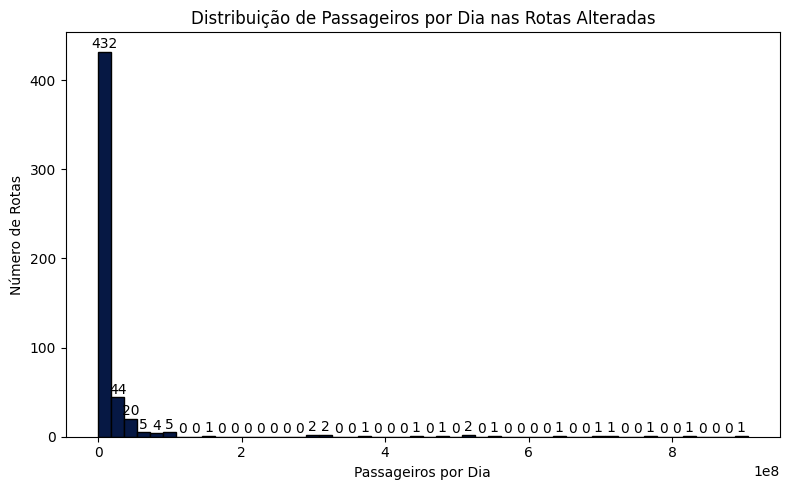

In [8]:
#linhas que foram extintas/modificadas
rotas_alteradas=df_passageiros.loc[~df_passageiros.route_id.str.lower().isin(df_rotas.route_id.str.lower())][['linha','route_id','data','passageiros_total']]
rotas_alteradas=rotas_alteradas.groupby(['linha','route_id']).agg(data_min=('data', 'min'), data_max=('data', 'max'),periodo_operacao=('data','count'),passageiros=('passageiros_total','sum')).reset_index().sort_values("data_max")
rotas_alteradas=rotas_alteradas[rotas_alteradas['periodo_operacao']>1].reset_index(drop=True)
rotas_alteradas['passageiros/dia']=rotas_alteradas['passageiros']/rotas_alteradas['periodo_operacao']
plt.figure(figsize=(8, 5))
counts, bins, patches = plt.hist(rotas_alteradas['passageiros/dia'], bins=50, color='#061844', edgecolor='black')

# Adiciona rótulos sobre as barras
for count, bin_left, bin_right in zip(counts, bins[:-1], bins[1:]):
    x = (bin_left + bin_right) / 2  # centro da barra
    y = count
    plt.text(x, y + 0.5, int(count), ha='center', va='bottom', fontsize=10)

# Títulos e rótulos
plt.title('Distribuição de Passageiros por Dia nas Rotas Alteradas')
plt.xlabel('Passageiros por Dia')
plt.ylabel('Número de Rotas')

# Mostrar o gráfico
plt.tight_layout()
plt.show()

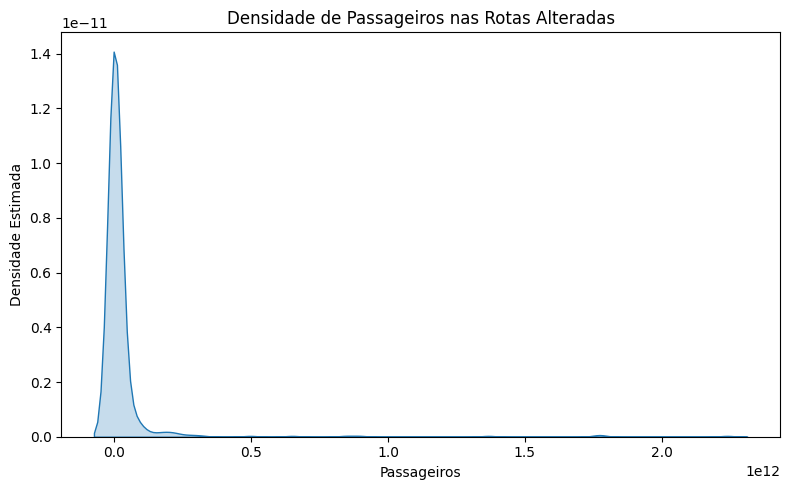

In [9]:

plt.figure(figsize=(8, 5))
sns.kdeplot(rotas_alteradas['passageiros'], fill=True, bw_adjust=0.5)
plt.title('Densidade de Passageiros nas Rotas Alteradas')
plt.xlabel('Passageiros')
plt.ylabel('Densidade Estimada')
plt.tight_layout()
plt.show()

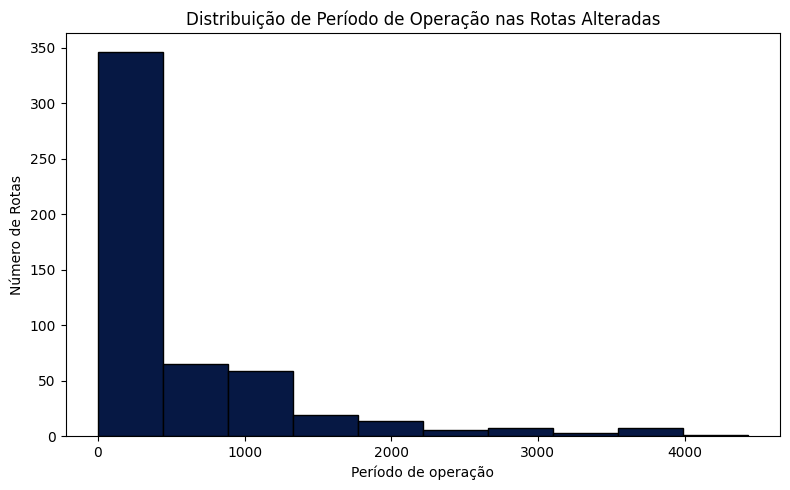

In [10]:

plt.figure(figsize=(8, 5))
plt.hist(rotas_alteradas['periodo_operacao'], bins=10, color='#061844', edgecolor='black')

# Títulos e rótulos
plt.title('Distribuição de Período de Operação nas Rotas Alteradas')
plt.xlabel('Período de operação')
plt.ylabel('Número de Rotas')

# Mostrar o gráfico
plt.tight_layout()
plt.show()

In [11]:
abc=df_passageiros[(df_passageiros.route_id.str.lower().isin(df_viagens.route_id.str.lower()))&(df_passageiros.route_id.str.lower().isin(df_rotas.route_id.str.lower()))].route_id.drop_duplicates().shape[0]
ab=df_passageiros[(df_passageiros.route_id.str.lower().isin(df_rotas.route_id.str.lower()))].route_id.drop_duplicates().shape[0] - abc
bc= df_rotas[(df_rotas.route_id.str.lower().isin(df_viagens.route_id.str.lower()))].route_id.drop_duplicates().shape[0] - abc
ac=df_passageiros[(df_passageiros.route_id.str.lower().isin(df_viagens.route_id.str.lower()))].route_id.drop_duplicates().shape[0] - abc
a=df_passageiros.route_id.drop_duplicates().shape[0] - abc - ab - ac
b= df_rotas.route_id.drop_duplicates().shape[0] - abc - ab - bc
c=df_viagens.route_id.drop_duplicates().shape[0] - abc - bc - ac

In [20]:
df_viagens[df_viagens.route_id.str.contains("177H")].route_id.drop_duplicates()

3875    177H21
Name: route_id, dtype: object

In [24]:
df_rotas[(~df_rotas.route_id.apply(lambda x: x[:4]).str.lower().isin(df_viagens.route_id.apply(lambda x: x[:4]).str.lower()))]

,route_id,agency_id,route_short_name,route_long_name,route_type,route_color,route_text_color
2,101410,1,1014-10,Morro Doce - Cptm Perus,3,509E2F,FFFFFF
10,102210,1,1022-10,Cptm Perus - Vl. Sta. Cruz,3,509E2F,FFFFFF
133,203010,1,2030-10,Lauzane Paulista - Metrô Santana,3,002F6C,FFFFFF
141,207910,1,2079-10,Jd. Nélia - Cptm Itaim Paulista,3,FFD100,000000
150,210110,1,2101-10,Pça. Silvio Romero - Pça. Da Sé,3,DA291C,FFFFFF
151,210141,1,2101-41,Pça. Silvio Romero - Term. Vl. Prudente,3,DA291C,FFFFFF
159,213E10,1,213E-10,Pq. Edu Chaves - Metrô Belém,3,002F6C,FFFFFF
239,273F10,1,273F-10,Vl. Mara - Metrô Itaquera,3,FFD100,000000
275,301510,1,3015-10,Jd. Romano - Jd. Mabel,3,FFD100,000000
343,372F10,1,372F-10,Univ. São Judas Tadeu - Metrô Bresser,3,DA291C,FFFFFF


In [25]:
df_rotas[(~df_rotas.route_id.str.lower().isin(df_passageiros.route_id.str.lower()))&(df_rotas.route_id.apply(lambda x: x[:4]).str.lower().isin(df_passageiros.route_id.apply(lambda x: x[:4]).str.lower()))]

,route_id,agency_id,route_short_name,route_long_name,route_type,route_color,route_text_color
146,209P1,1,209P-1,Cachoeirinha - Term. Pinheiros,3,509E2F,FFFFFF
840,695T1,1,695T-1,Term. Capelinha - Metrô Vl. Mariana,3,782F40,FFFFFF
959,80001,1,8000-1,Term. Lapa - Pça. Ramos De Azevedo,3,509E2F,FFFFFF
1047,83001,1,8300-1,Term. Pirituba - Term. Lapa,3,509E2F,FFFFFF
1084,87001,1,8700-1,Term. Campo Limpo - Pça. Ramos De Azevedo,3,FF671F,000000
1095,875C1,1,875C-1,Term. Lapa - Metrô Sta. Cruz,3,FF671F,000000
1128,909T1,1,909T-1,Term. Pinheiros - Term. Pq. D. Pedro Ii,3,FF671F,000000
1185,CT011,1,CT01-1,Circular - Turismo,3,002F6C,FFFFFF


In [39]:
print(df_rotas[df_rotas.route_id.str.contains("909T")][['route_id','route_long_name']].to_latex(index=False))

\begin{tabular}{ll}
\toprule
route_id & route_long_name \\
\midrule
909T1 & Term. Pinheiros - Term. Pq. D. Pedro Ii \\
909T10 & Term. Pinheiros - Term. Pq. D. Pedro Ii \\
\bottomrule
\end{tabular}



In [27]:
df_passageiros[df_passageiros.route_id.str.contains("875C")]

,data,tipo,area,empresa,linha,passageiros_dinheiro,passageiros_comum,passageiros_comum_mensal,passageiros_estudante,passageiros_estudante_mensal,...,passageiros_integracao_onibus,passageiros_gratuitos,passageiros_total,arquivo,passageiros_gratuitos_estudante,passageiros_comum_vt,grupo,lote,route_id,passageiros_integracao
531,2015-01-01,CONCESSAO,AREA 8,GATO PRETO,875C10 - LAPA/METRO STA CRUZ,101060,105170,80,1020,0,...,401030,8030,10003010,C:\Users\franc\OneDrive\Documentos\TCC\dados\p...,<NA>,<NA>,None,None,875C10,408120
568,2015-01-01,CONCESSAO,AREA 8,TRANSPASS,875C10 - LAPA/METRO STA CRUZ,206060,307050,3030,2020,0,...,705030,107080,20100030,C:\Users\franc\OneDrive\Documentos\TCC\dados\p...,<NA>,<NA>,None,None,875C10,811060
1570,2015-01-02,CONCESSAO,AREA 8,GATO PRETO,875C10 - LAPA/METRO STA CRUZ,306050,608120,2080,4020,0,...,10309050,209030,30601080,C:\Users\franc\OneDrive\Documentos\TCC\dados\p...,<NA>,<NA>,None,None,875C10,10515130
1619,2015-01-02,CONCESSAO,AREA 8,TRANSPASS,875C10 - LAPA/METRO STA CRUZ,800050,10709130,6040,8030,20,...,30009040,608060,80406020,C:\Users\franc\OneDrive\Documentos\TCC\dados\p...,<NA>,<NA>,None,None,875C10,30610130
2644,2015-01-03,CONCESSAO,AREA 8,GATO PRETO,875C10 - LAPA/METRO STA CRUZ,204040,411090,2050,2070,0,...,904050,200060,20409030,C:\Users\franc\OneDrive\Documentos\TCC\dados\p...,<NA>,<NA>,None,None,875C10,1009050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4933490,2025-03-30,None,None,Transppass,875C10 - LAPA/METRO STA CRUZ,0,<NA>,0,0,0,...,0,30102010,30102010,C:\Users\franc\OneDrive\Documentos\TCC\dados\p...,0,0,GRUPO ARTICULACAO,AR9,875C10,<NA>
4934995,2025-01-31,None,None,Gato Preto,875C01 - TERM LAPA/METRO STA CRUZ,208030,<NA>,109090,7070,0,...,10900010,10000000,60308080,C:\Users\franc\OneDrive\Documentos\TCC\dados\p...,1050,20901030,GRUPO ARTICULACAO,AR8,875C01,<NA>
4935065,2025-01-31,None,None,Transppass,875C10 - LAPA/METRO STA CRUZ,504080,<NA>,304050,103000,0,...,30407030,10705050,1010909050,C:\Users\franc\OneDrive\Documentos\TCC\dados\p...,4000,50700040,GRUPO ARTICULACAO,AR9,875C10,<NA>
4935986,2025-03-31,None,None,Gato Preto,875C01 - TERM LAPA/METRO STA CRUZ,208040,<NA>,107030,200030,0,...,10807050,900010,60600010,C:\Users\franc\OneDrive\Documentos\TCC\dados\p...,104060,30001090,GRUPO ARTICULACAO,AR8,875C01,<NA>


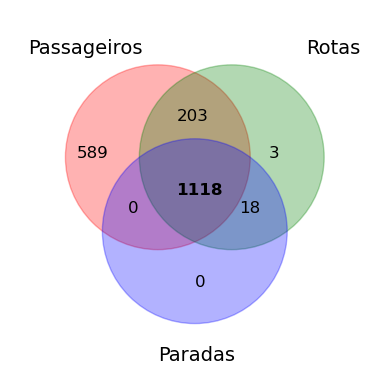

In [ ]:

fig, ax = plt.subplots()

# Círculos com transparência
circle_A = Circle((0.4, 0.6), 0.25, color='red', alpha=0.3)
circle_B = Circle((0.6, 0.6), 0.25, color='green', alpha=0.3)
circle_C = Circle((0.5, 0.4), 0.25, color='blue', alpha=0.3)

ax.add_patch(circle_A)
ax.add_patch(circle_B)
ax.add_patch(circle_C)

# Rótulos dos conjuntos
ax.text(0.05, 0.88, 'Passageiros', fontsize=14) #A
ax.text(0.80, 0.88, 'Rotas', fontsize=14) #B
ax.text(0.4, 0.05, 'Paradas', fontsize=14) #C

# Texto nas 7 regiões do diagrama (posições ajustadas manualmente)
ax.text(0.18, 0.60, a, fontsize=12)        # Somente A
ax.text(0.70, 0.60, b, fontsize=12)        # Somente B
ax.text(0.50, 0.25, c, fontsize=12)        # Somente C
ax.text(0.45, 0.70, ab, fontsize=12)       # A ∩ B
ax.text(0.32, 0.45, ac, fontsize=12)       # A ∩ C
ax.text(0.62, 0.45, bc, fontsize=12)       # B ∩ C
ax.text(0.45, 0.50, abc, fontsize=12, fontweight='bold')  # A ∩ B ∩ C

# Estética
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
ax.axis('off')

# plt.title("Diagrama de Venn com as intersecções de rotas entre \n as bases passageiros, paradas e rotas", fontsize=14)
plt.savefig("dados\diagrama_de_venn_intersec_rotas_passageiros_paradas.png")
plt.show()


In [ ]:
rotas_alteradas_agrupadas=rotas_alteradas.copy()
rotas_alteradas_agrupadas=rotas_alteradas_agrupadas.groupby("route_id").sum()[['passageiros','periodo_operacao']].reset_index()
# Mapeando os valores para os períodos
rotas_alteradas_agrupadas['periodo'] = rotas_alteradas_agrupadas['periodo_operacao'].map(
    lambda x: '<=30 dias' if x <= 30 else ('30-90 dias' if x < 90 and x>30 else ('91-365 dias' if x <= 365 and x>90 else '>365')))

# Mapeando os valores para os passageiros
rotas_alteradas_agrupadas['passageiros'] = rotas_alteradas_agrupadas['passageiros'].map(
    lambda x: '<=100 passageiros' if x <= 100 else ('101-1.000 passageiros' if x <= 1000 and x>100 else ('1001-10000 passageiros' if x <= 10000 and x>1000 else '>10.000')))

# Agrupando e contando valores distintos
rotas_alteradas_agrupadas=rotas_alteradas_agrupadas.groupby(['passageiros', 'periodo'])['route_id'].nunique().reset_index().drop_duplicates().sort_values("route_id").pivot(columns='passageiros', index='periodo', values='route_id').fillna(0)
print(rotas_alteradas_agrupadas.to_latex())

\begin{tabular}{lrrrr}
\toprule
passageiros &  1001-10000 passageiros &  101-1.000 passageiros &  <=100 passageiros &  >10.000 \\
periodo     &                         &                        &                    &          \\
\midrule
30-90 dias  &                     0.0 &                    0.0 &                0.0 &     72.0 \\
91-365 dias &                     0.0 &                    0.0 &                0.0 &     65.0 \\
<=30 dias   &                    12.0 &                    3.0 &                2.0 &    176.0 \\
>365        &                     0.0 &                    0.0 &                0.0 &    197.0 \\
\bottomrule
\end{tabular}



C:\Users\franc\AppData\Local\Temp\ipykernel_6188\4136579423.py:13: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(rotas_alteradas_agrupadas.to_latex())
